In [2]:
from pathlib import Path
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Exploratory Data Analysis

**Data used:** `data/processed/clean_for_eda.csv` (from Problem 3).  
**Notes:** Column names standardized to `snake_case`; `patient_id` and constant `doctor_in_charge` were dropped.

### 1) Integrity & shape
- Rows/columns (after drops): **2392 × 27**.
- **Missing values:** none.
- **Duplicate rows:** none.

In [4]:
sns.set(style="whitegrid")
pd.set_option("display.max_columns", None)
PROC = Path("..") / "data" / "processed" / "clean_for_eda.csv"
RAW  = Path("..") / "data" / "raw" / "asthma_disease_data.csv"

if PROC.exists():
    df = pd.read_csv(PROC)
    print("Loaded processed dataset:", PROC)
else:
    df = pd.read_csv(RAW)
    print("Processed not found; loaded raw:", RAW)

print("Shape:", df.shape)
df.head()

Loaded processed dataset: ..\data\processed\clean_for_eda.csv
Shape: (2392, 27)


,age,gender,ethnicity,education_level,bmi,smoking,physical_activity,diet_quality,sleep_quality,pollution_exposure,pollen_exposure,dust_exposure,pet_allergy,family_history_asthma,history_of_allergies,eczema,hay_fever,gastroesophageal_reflux,lung_function_fev_1,lung_function_fvc,wheezing,shortness_of_breath,chest_tightness,coughing,nighttime_symptoms,exercise_induced,diagnosis
0,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,7.388481,2.855578,0.974339,1,1,0,0,0,0,1.369051,4.941206,0,0,1,0,0,1,0
1,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,1.969838,7.457665,6.584631,0,0,1,0,0,0,2.197767,1.702393,1,0,0,1,1,1,0
2,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,1.460593,1.448189,5.445799,0,1,1,0,1,0,1.698011,5.022553,1,1,1,0,1,1,0
3,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,0.581905,7.571845,3.965316,0,0,0,0,1,0,3.032037,2.300159,1,0,1,1,1,0,0
4,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,0.980875,3.049807,8.260605,0,0,0,0,1,0,3.470589,3.067944,1,1,1,0,0,1,0


In [5]:
df.info()
display(df.describe(include="all").T)

print("Missing values per column:\n", df.isna().sum())
print("Duplicate rows:", df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      2392 non-null   int64  
 1   gender                   2392 non-null   int64  
 2   ethnicity                2392 non-null   int64  
 3   education_level          2392 non-null   int64  
 4   bmi                      2392 non-null   float64
 5   smoking                  2392 non-null   int64  
 6   physical_activity        2392 non-null   float64
 7   diet_quality             2392 non-null   float64
 8   sleep_quality            2392 non-null   float64
 9   pollution_exposure       2392 non-null   float64
 10  pollen_exposure          2392 non-null   float64
 11  dust_exposure            2392 non-null   float64
 12  pet_allergy              2392 non-null   int64  
 13  family_history_asthma    2392 non-null   int64  
 14  history_of_allergies    

,count,mean,std,min,25%,50%,75%,max
age,2392.0,42.137960,21.606655,5.000000,23.000000,42.000000,61.000000,79.000000
gender,2392.0,0.493311,0.500060,0.000000,0.000000,0.000000,1.000000,1.000000
ethnicity,2392.0,0.669732,0.986120,0.000000,0.000000,0.000000,1.000000,3.000000
education_level,2392.0,1.307274,0.898242,0.000000,1.000000,1.000000,2.000000,3.000000
bmi,2392.0,27.244877,7.201628,15.031803,20.968313,27.052202,33.555903,39.985611
smoking,2392.0,0.141722,0.348838,0.000000,0.000000,0.000000,0.000000,1.000000
physical_activity,2392.0,5.051786,2.903574,0.001740,2.578333,5.016881,7.540234,9.995809
diet_quality,2392.0,5.022867,2.909980,0.003031,2.432043,5.115383,7.544216,9.999904
sleep_quality,2392.0,7.019012,1.732475,4.001437,5.498500,6.975839,8.526950,9.996235
pollution_exposure,2392.0,5.013030,2.935605,0.001022,2.432559,5.036519,7.630037,9.998964


Missing values per column:
 age                        0
gender                     0
ethnicity                  0
education_level            0
bmi                        0
smoking                    0
physical_activity          0
diet_quality               0
sleep_quality              0
pollution_exposure         0
pollen_exposure            0
dust_exposure              0
pet_allergy                0
family_history_asthma      0
history_of_allergies       0
eczema                     0
hay_fever                  0
gastroesophageal_reflux    0
lung_function_fev_1        0
lung_function_fvc          0
wheezing                   0
shortness_of_breath        0
chest_tightness            0
coughing                   0
nighttime_symptoms         0
exercise_induced           0
diagnosis                  0
dtype: int64
Duplicate rows: 0


### 2) Target distribution (`diagnosis`)
- Class counts: **0 → 2268**, **1 → 124**.
- Class proportions: **0 → 94.82%**, **1 → 5.18%**.
- **Implication:** Strong class imbalance → accuracy is not informative; prefer **recall, F1 (positive class), ROC‑AUC**, and use class weighting / resampling in modeling.

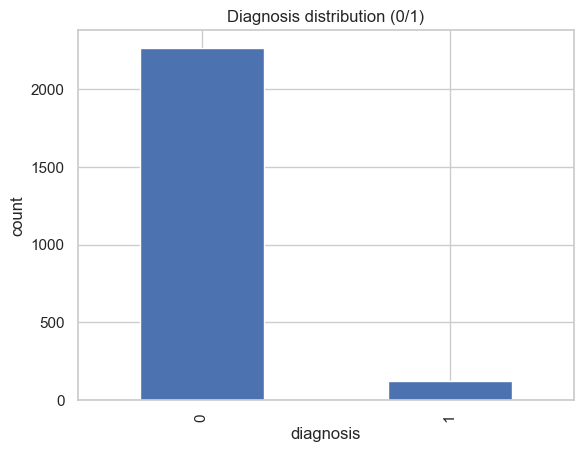

Proportions:
 diagnosis
0    0.948161
1    0.051839
Name: proportion, dtype: float64


In [6]:
target = "diagnosis"
assert target in df.columns, f"Expected '{target}' in columns, got: {df.columns.tolist()}"

ax = df[target].value_counts().plot(kind="bar")
ax.set_title("Diagnosis distribution (0/1)")
ax.set_xlabel("diagnosis")
ax.set_ylabel("count")
plt.show()

print("Proportions:\n", df[target].value_counts(normalize=True))

### 3) Univariate distributions (continuous features)
- Example continuous features: `age`, `bmi`, `physical_activity`, `diet_quality`, `sleep_quality`, `pollution_exposure`, `pollen_exposure`, `dust_exposure`, `lung_function_fev1`, `lung_function_fvc`.
- Typical ranges look reasonable; e.g., **age ≈ 5–79 (mean ~42)**, **bmi ≈ 15–40 (mean ~27)**.
- Histograms were plotted with spacing (adjusted `hspace`/`wspace`) for readability.

In [7]:
cat_cols = [c for c in ["gender", "ethnicity", "education_level"] if c in df.columns]

cont_cols = [c for c in [
    "age", "bmi", "physical_activity", "diet_quality", "sleep_quality",
    "pollution_exposure", "pollen_exposure", "dust_exposure",
    "lung_function_fev1", "lung_function_fvc"
] if c in df.columns]

binary_cols = [
    c for c in df.columns
    if c not in cat_cols + cont_cols + [target]
       and set(df[c].unique()).issubset({0, 1})
]

print("Categorical:", cat_cols)
print("Continuous:", cont_cols)
print("Binary:", binary_cols[:10], "..." if len(binary_cols) > 10 else "")

Categorical: ['gender', 'ethnicity', 'education_level']
Continuous: ['age', 'bmi', 'physical_activity', 'diet_quality', 'sleep_quality', 'pollution_exposure', 'pollen_exposure', 'dust_exposure', 'lung_function_fvc']
Binary: ['smoking', 'pet_allergy', 'family_history_asthma', 'history_of_allergies', 'eczema', 'hay_fever', 'gastroesophageal_reflux', 'wheezing', 'shortness_of_breath', 'chest_tightness'] ...


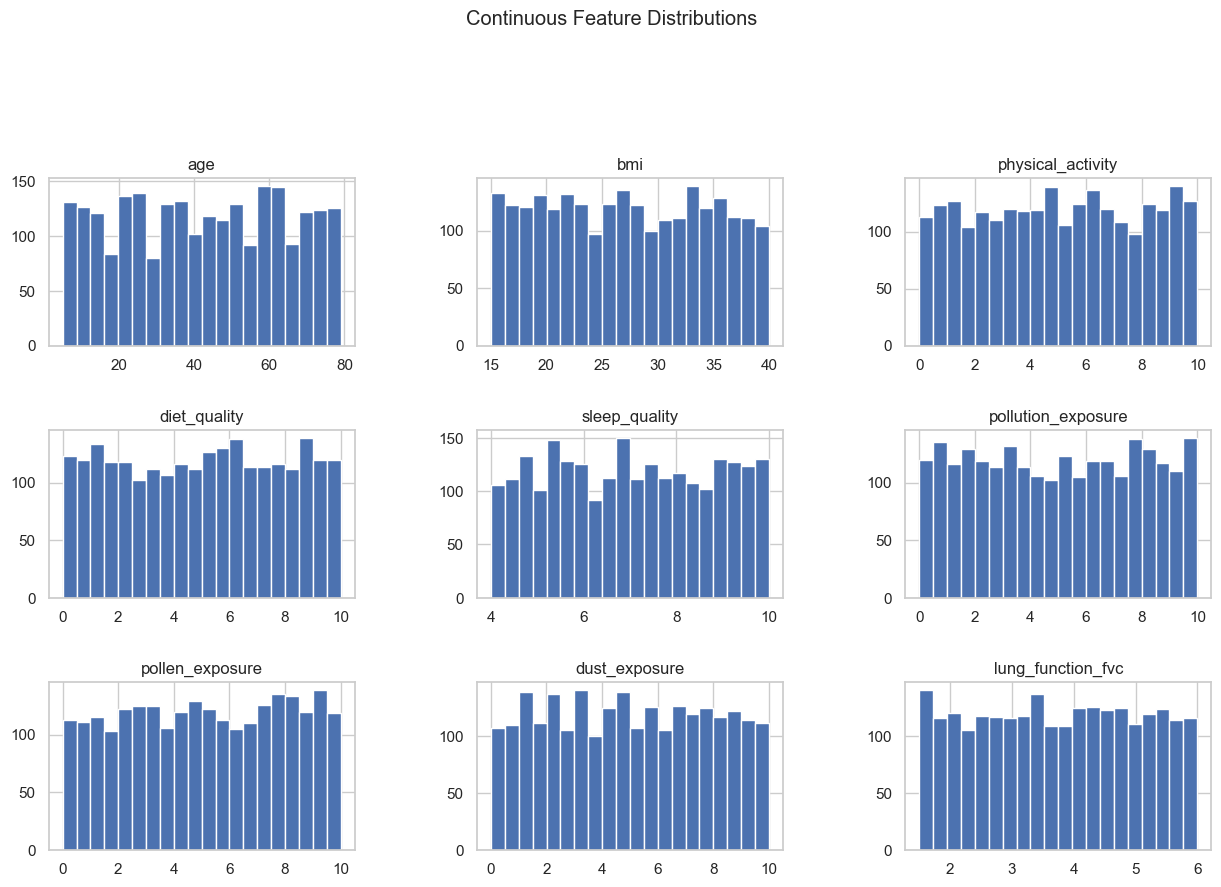

In [8]:
if cont_cols:
    ax = df[cont_cols].hist(bins=20, figsize=(15, 12), layout=(4, 3))
    plt.suptitle("Continuous Feature Distributions", y=1.02)
    plt.subplots_adjust(hspace=0.5, wspace=0.4)
    plt.show()
else:
    print("No continuous columns found.")

### 4) Correlations
- Pearson correlation heatmap (continuous + `diagnosis`) shows **no strong linear relationships** (values near 0 across the board).
- **Implication:** Expect **non‑linear models** (e.g., tree ensembles) and **feature interactions** to be more effective than relying on linear correlation alone.

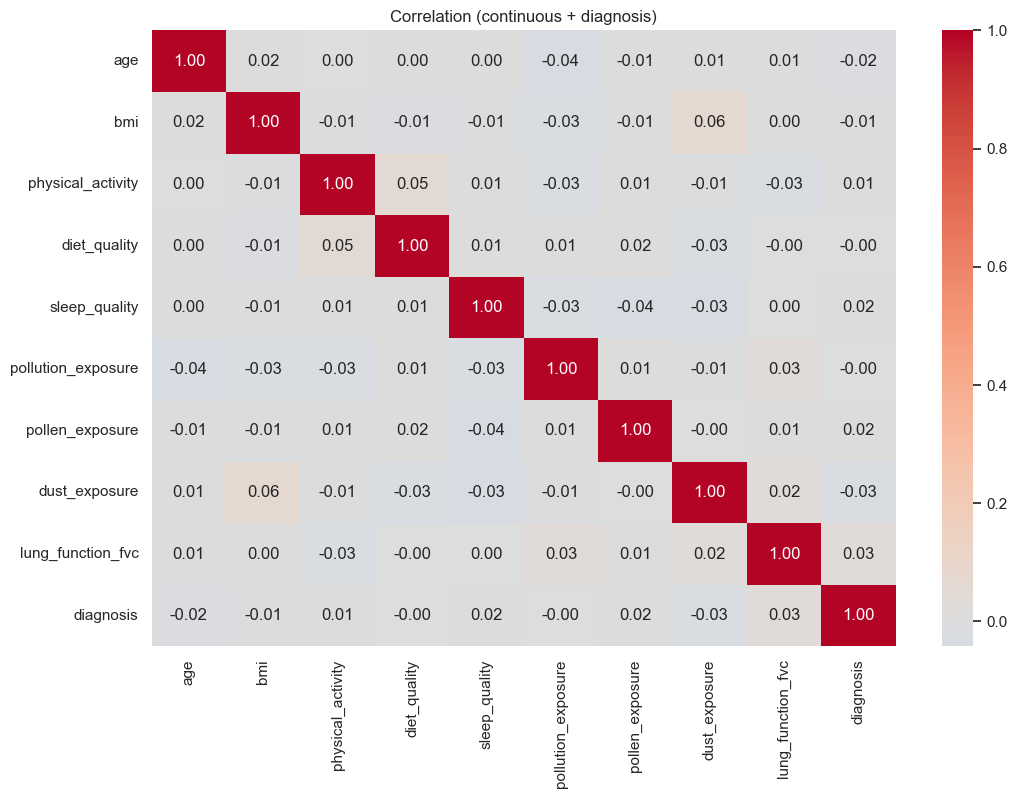

In [9]:
if cont_cols:
    plt.figure(figsize=(12, 8))
    corr = df[cont_cols + [target]].corr(numeric_only=True)
    sns.heatmap(corr, cmap="coolwarm", center=0, annot=True, fmt=".2f")
    plt.title("Correlation (continuous + diagnosis)")
    plt.show()
else:
    print("No continuous columns for correlation.")

### 5) Categorical & binary features vs target
- Categorical codes (`gender`, `ethnicity`, `education_level`) show **limited separation** visually.
- Symptom/history binaries (`wheezing`, `shortness_of_breath`, `chest_tightness`, `coughing`, `nighttime_symptoms`, `exercise_induced`, etc.) show **higher asthma rates when present**, but effects are modest in univariate views due to imbalance.

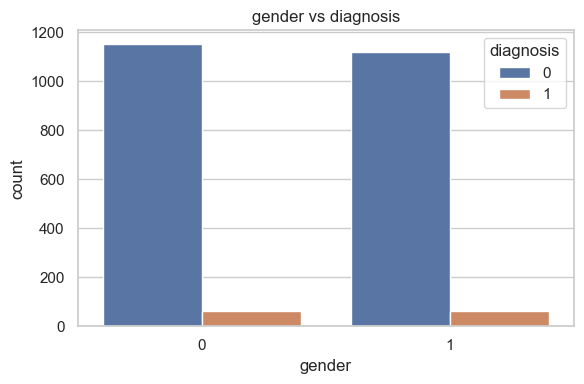

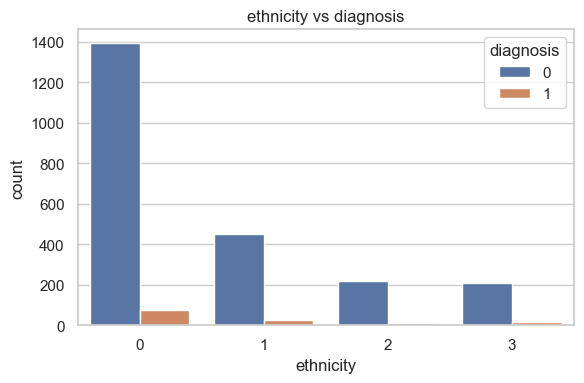

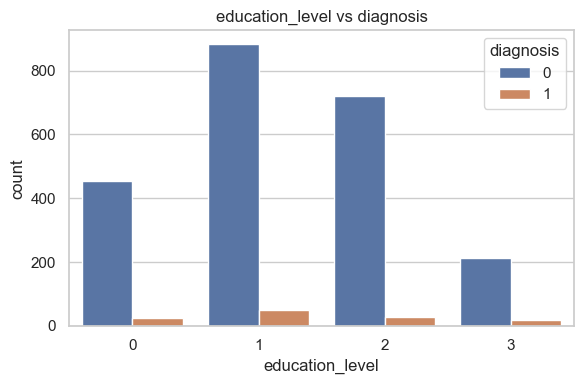

In [10]:
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, hue=target)
    plt.title(f"{col} vs {target}")
    plt.tight_layout()
    plt.show()

In [11]:
rows = []
for col in binary_cols:
    rates = df.groupby(col)[target].mean()
    r0 = rates.get(0, np.nan)
    r1 = rates.get(1, np.nan)
    lift = r1 - r0 if pd.notnull(r0) and pd.notnull(r1) else np.nan
    rows.append({"feature": col, "rate_if_0": r0, "rate_if_1": r1, "lift": lift})

bin_rates = pd.DataFrame(rows).sort_values("lift", ascending=False)
display(bin_rates.head(15))

,feature,rate_if_0,rate_if_1,lift
12,exercise_induced,0.037037,0.061507,0.024470
6,gastroesophageal_reflux,0.049652,0.063492,0.013840
7,wheezing,0.044513,0.056802,0.012289
2,family_history_asthma,0.052033,0.051389,-0.000645
3,history_of_allergies,0.052192,0.051309,-0.000883
4,eczema,0.052768,0.047930,-0.004837
8,shortness_of_breath,0.055230,0.048454,-0.006776
1,pet_allergy,0.053133,0.045340,-0.007793
5,hay_fever,0.054311,0.044554,-0.009757
11,nighttime_symptoms,0.057834,0.047883,-0.009950


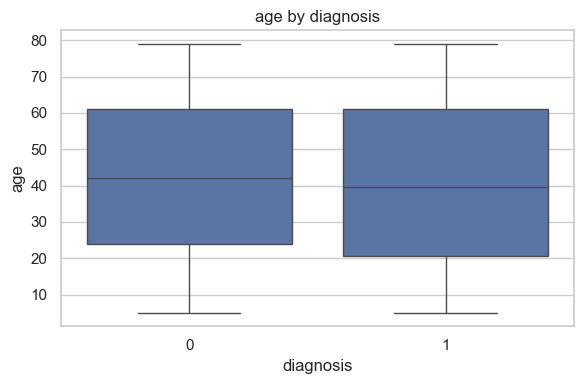

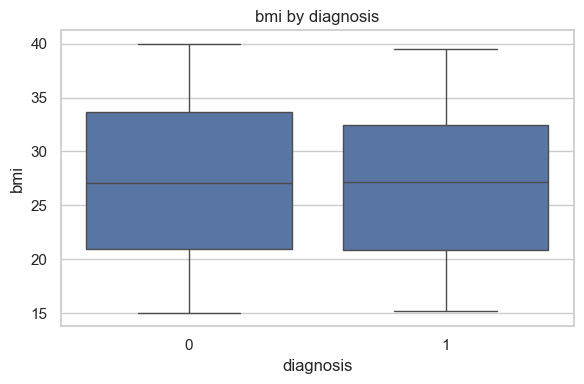

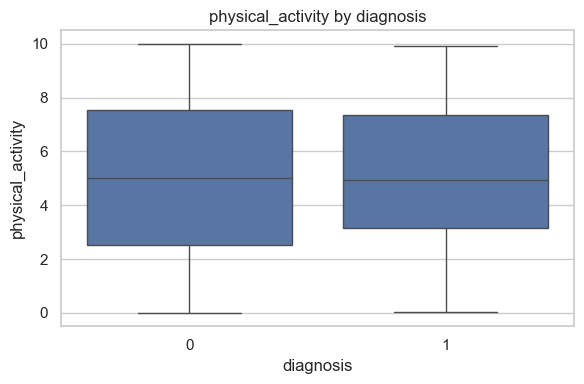

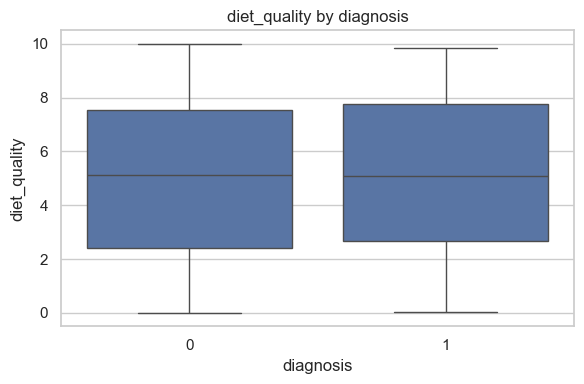

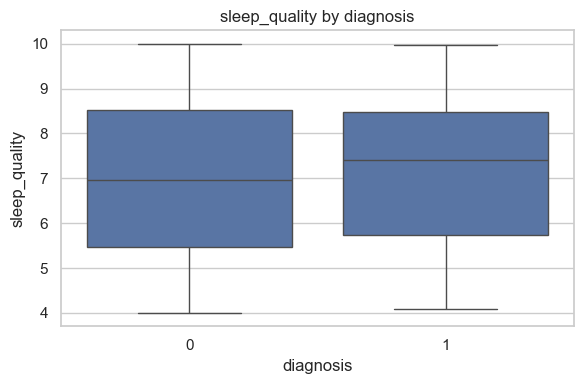

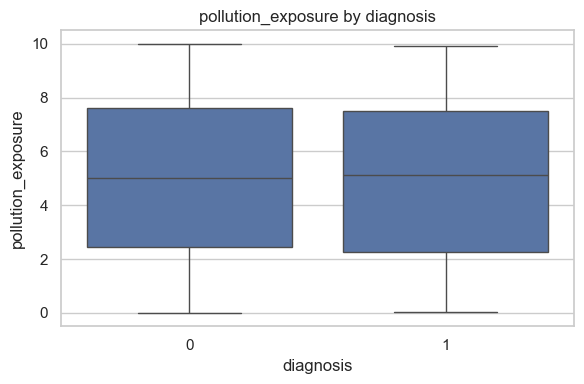

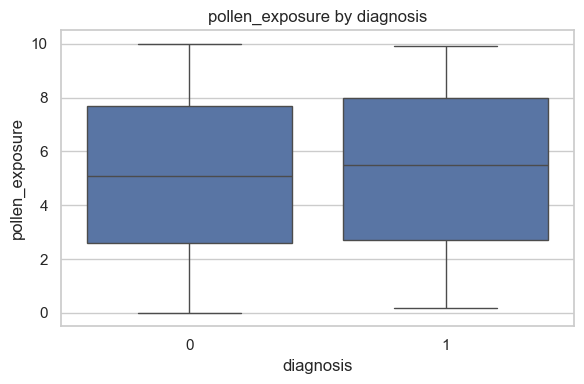

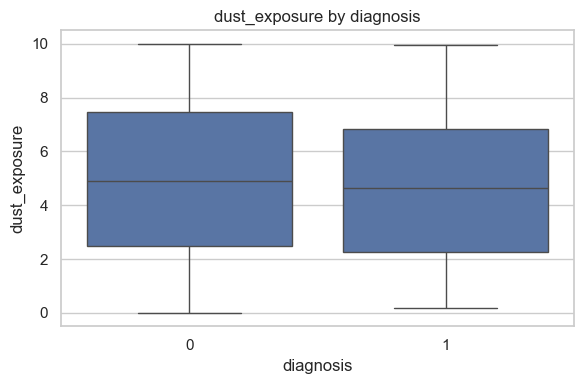

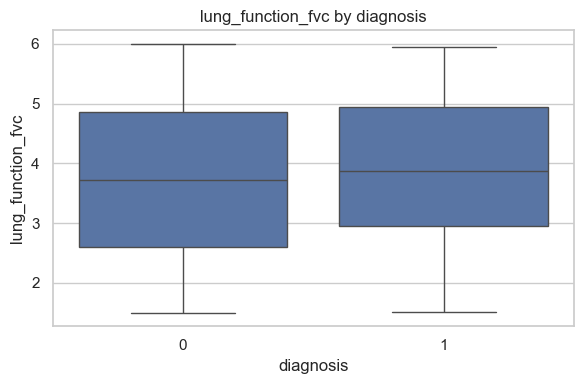

In [12]:
for col in cont_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x=target, y=col)
    plt.title(f"{col} by {target}")
    plt.tight_layout()
    plt.show()

### 6) Univariate signal via Mutual Information (top features)
Mutual information (MI) estimates how informative each single feature is about `diagnosis` (captures non‑linear relationships). Top scores observed:

- `bmi` → **0.00535**
- `pollen_exposure` → **0.00524**
- `education_level_2` → **0.00375**
- `gender_1` → **0.00357**
- `education_level_1` → **0.00221**
- `diet_quality` → **0.00179**
- `lung_function_fvc` → **0.00155**
- `exercise_induced` → **0.00152**
- `chest_tightness` → **0.00077**
- `wheezing` → **0.00038**
- `coughing` → **0.00029**
- *(others smaller: `ethnicity_1`, `gastroesophageal_reflux`, `nighttime_symptoms`, `smoking`)*

**Interpretation:** All MI values are small (expected with ~5% positives). Still, features like **exposures, BMI, lung function, some symptoms** show the most univariate signal and are worth keeping; interactions may matter more than any single feature.

> (If executed) The MI bar chart was saved to: `reports/figures/mi_top_features.png`.

In [13]:
from sklearn.feature_selection import mutual_info_classif

X = df.drop(columns=[target]).copy()
y = df[target].astype(int)

X_enc = pd.get_dummies(X, columns=cat_cols, drop_first=True)
mi = mutual_info_classif(X_enc.fillna(0), y, discrete_features=[col in binary_cols for col in X_enc.columns])
mi_series = pd.Series(mi, index=X_enc.columns).sort_values(ascending=False)

print("Top 15 features by mutual information:")
mi_series.head(15)

Top 15 features by mutual information:


bmi                        0.005352
pollen_exposure            0.005240
education_level_2          0.003748
gender_1                   0.003567
education_level_1          0.002211
diet_quality               0.001788
lung_function_fvc          0.001553
exercise_induced           0.001518
chest_tightness            0.000774
wheezing                   0.000376
coughing                   0.000293
ethnicity_1                0.000254
gastroesophageal_reflux    0.000246
nighttime_symptoms         0.000239
smoking                    0.000198
dtype: float64

In [14]:
FIG_DIR = Path("..") / "reports" / "figures"
FIG_DIR.mkdir(parents=True, exist_ok=True)

top_k = 20
plt.figure(figsize=(8, max(4, top_k/2)))
mi_series.head(top_k).iloc[::-1].plot(kind="barh")
plt.title("Top features by MI (univariate)")
plt.tight_layout()
out = FIG_DIR / "mi_top_features.png"
plt.savefig(out, dpi=150)
plt.close()
print("Saved:", out)

Saved: ..\reports\figures\mi_top_features.png


### 7) Key takeaways for modeling
- Address **class imbalance** (e.g., `class_weight="balanced"`, threshold tuning, or resampling).
- Start with **non‑linear models** (Random Forest / Gradient Boosting) to capture interactions; compare with a **regularized logistic regression** (with scaled continuous features and one‑hot categoricals).
- Evaluate with **ROC‑AUC, Recall (positive class), Precision‑Recall curve**, not just accuracy.
- Use **stratified** splits / cross‑validation due to minority class.

---